<a href="https://colab.research.google.com/github/hashir5/Customer_Segmentation_Using_K-Means_Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**" EcodeCamp "  DATA SCIENCE INTERNSHIP**

Task 2:
Customer Segmentation Using K-Means Clustering

Subimtted By: Hashir Ubaid

In [ ]:
#Importing All the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
# Read the Dataset File
data=pd.read_csv("Mall_Customers.csv")

In [ ]:
# Look at the First Five rows on the Dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Calculate correlation for the specified columns
columns_of_interest = ['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Age']
correlation_matrix = data[columns_of_interest].corr()

correlation_matrix

,CustomerID,Annual Income (k$),Spending Score (1-100),Age
CustomerID,1.000000,0.977548,0.013835,-0.026763
Annual Income (k$),0.977548,1.000000,0.009903,-0.012398
Spending Score (1-100),0.013835,0.009903,1.000000,-0.327227
Age,-0.026763,-0.012398,-0.327227,1.000000


<ipython-input-8-db5271ca95f6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

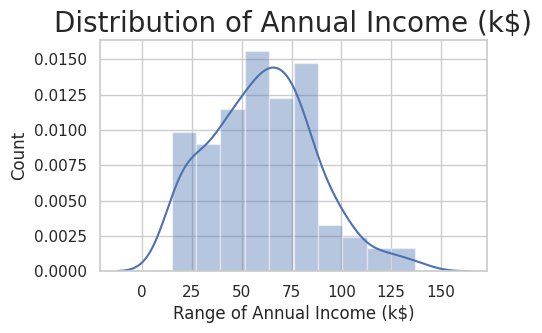

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

<ipython-input-9-784b28eb98d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

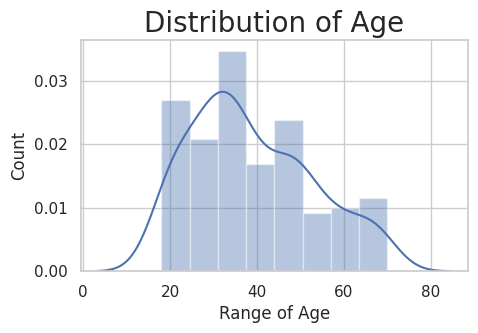

In [ ]:
#Distribution of age
plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

<ipython-input-10-aa029156d65b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

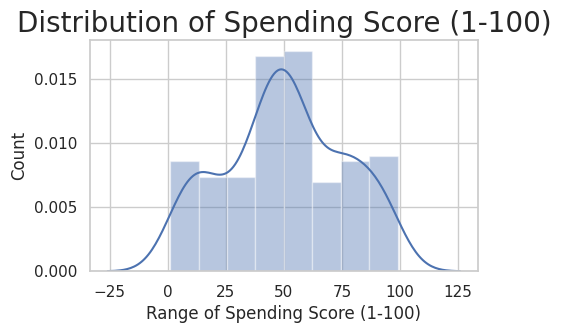

In [ ]:
#Distribution of spending score
plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

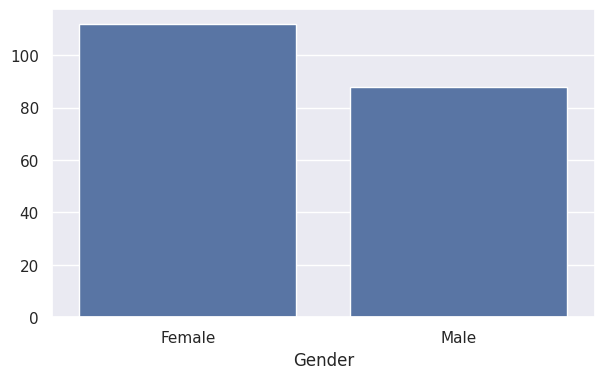

In [ ]:
# Get the count of each unique value in the 'Gender' column
genders = data.Gender.value_counts()

# Set the Seaborn plot style to 'darkgrid' for better visualization
sns.set_style("darkgrid")

# Create a figure with a specific size (width=10, height=4)
plt.figure(figsize=(7, 4))

# Create a bar plot using the gender counts
# 'x' is the unique gender values, and 'y' is the count of each gender
sns.barplot(x=genders.index, y=genders.values)

# Display the plot
plt.show()


In [ ]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
# Check the first five rows of X variable that store value of these columns
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


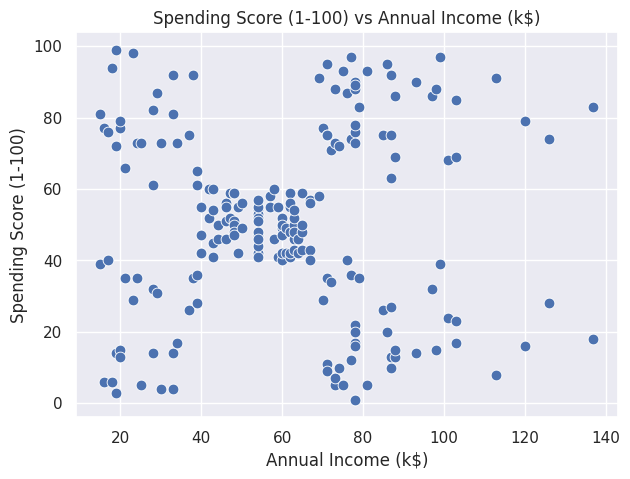

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
# Importing K-Means from sklearn
from sklearn.cluster import KMeans

In [ ]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each k value
wcss = []

# Loop through different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    # Initialize the KMeans model with 'i' clusters
    km = KMeans(n_clusters=i)

    # Fit the KMeans model to the data 'X'
    km.fit(X)

    # Append the inertia (within-cluster sum of squares) of the fitted model to the 'wcss' list
    wcss.append(km.inertia_)


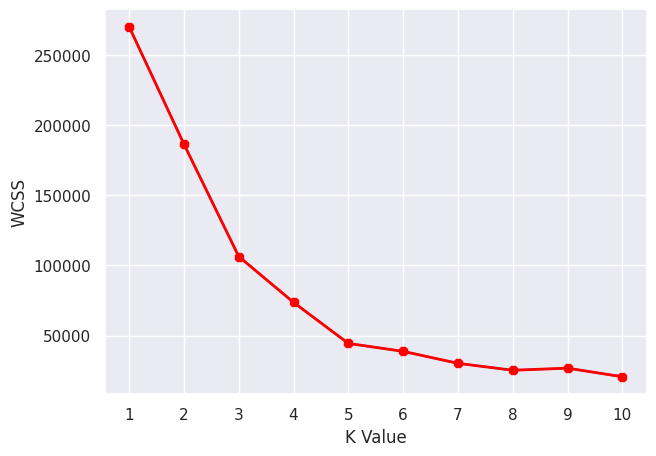

In [ ]:
#The elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)

#Fitting the input data
km1.fit(X)

#predicting the labels of the input data
y=km1.predict(X)

#adding the labels to a column named label
df1["label"] = y

#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


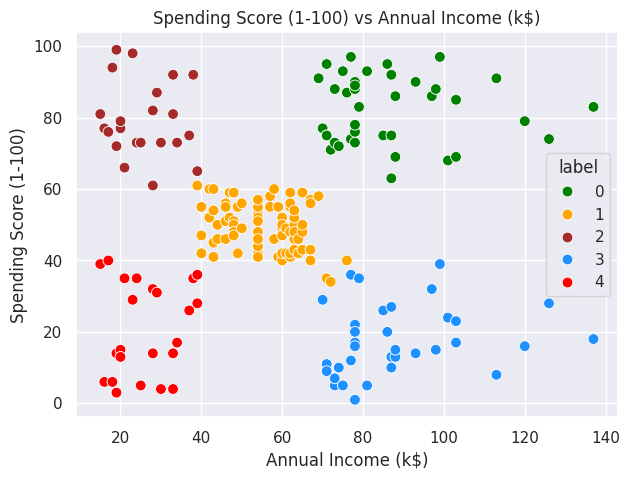

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

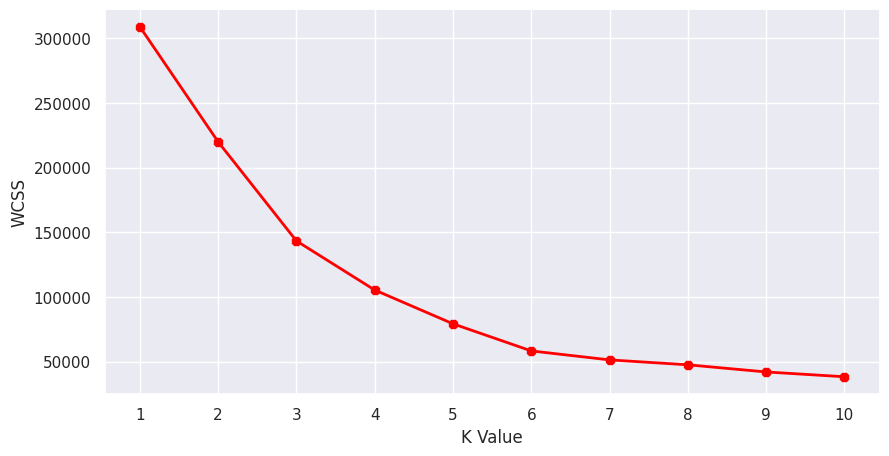

In [ ]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]

#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
# We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2

# The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,9
1,2,Male,21,15,81,2
2,3,Female,20,16,6,9
3,4,Female,23,16,77,2
4,5,Female,31,17,40,9


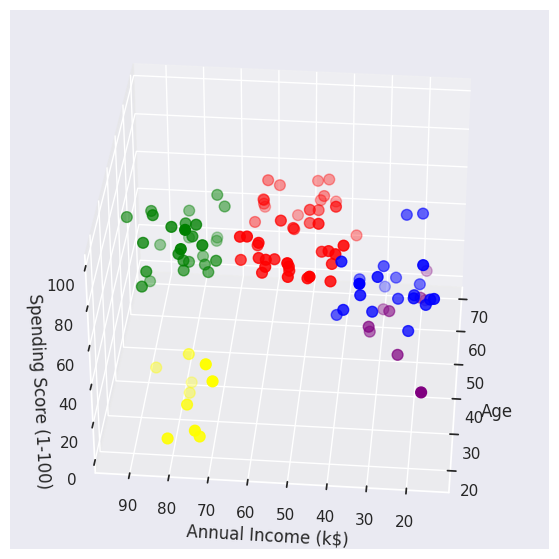

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
# Filter customers belonging to the first group where 'label' equals 1
cust1 = df1[df1["label"] == 1]
# Print the number of customers in the first group
print('Number of customers in 1st group =', len(cust1))
# Display the CustomerIDs of the customers in the first group
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")

# Filter customers belonging to the second group where 'label' equals 2
cust2 = df1[df1["label"] == 2]
# Print the number of customers in the second group
print('Number of customers in 2nd group =', len(cust2))
# Display the CustomerIDs of the customers in the second group
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")

# Filter customers belonging to the third group where 'label' equals 0
cust3 = df1[df1["label"] == 0]
# Print the number of customers in the third group
print('Number of customers in 3rd group =', len(cust3))
# Display the CustomerIDs of the customers in the third group
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")

# Filter customers belonging to the fourth group where 'label' equals 3
cust4 = df1[df1["label"] == 3]
# Print the number of customers in the fourth group
print('Number of customers in 4th group =', len(cust4))
# Display the CustomerIDs of the customers in the fourth group
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")

# Filter customers belonging to the fifth group where 'label' equals 4
cust5 = df1[df1["label"] == 4]
# Print the number of customers in the fifth group
print('Number of customers in 5th group =', len(cust5))
# Display the CustomerIDs of the customers in the fifth group
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")


Number of customers in 1st group = 44
They are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120]
--------------------------------------------
Number of customers in 2nd group = 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customers in 3rd group = 9
They are - [ 7  9 11 13 23 25 31 33 35]
--------------------------------------------
Number of customers in 4th group = 29
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180]
--------------------------------------------
Number of customers in 5th group = 10
They are - [125 133 135 139 145 149 157 159 163 173]
--------------------------------------------


**THE END**